In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()
tf.set_random_seed(5)
np.random.seed(42)

# 简单函数参数推导

In [13]:
# 输入的数据，固定值
x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

# 权重变量
w = tf.Variable(tf.constant(4.))

# 计算公式
multiplication = tf.multiply(w, x_data)

# 损失函数
loss = tf.square(tf.subtract(multiplication, 50.))

# 优化器
opt = tf.train.GradientDescentOptimizer(0.01)

# 训练目标
train = opt.minimize(loss)

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

print('Optimizing a Multiplication Gate Output to 50.')
for i in range(10):
    # 执行本轮的优化
    sess.run(train, feed_dict={x_data: x_val})
    
    # 获取最新的权重值
    w_val = sess.run(w)
    mult_output = sess.run(multiplication, feed_dict={x_data: x_val})
    print(str(w_val) + ' * ' + str(x_val) + ' = ' + str(mult_output))

Optimizing a Multiplication Gate Output to 50.
7.0 * 5.0 = 35.0
8.5 * 5.0 = 42.5
9.25 * 5.0 = 46.25
9.625 * 5.0 = 48.125
9.8125 * 5.0 = 49.0625
9.90625 * 5.0 = 49.5312
9.95312 * 5.0 = 49.7656
9.97656 * 5.0 = 49.8828
9.98828 * 5.0 = 49.9414
9.99414 * 5.0 = 49.9707


# 多参数推导

In [17]:
ops.reset_default_graph()
sess = tf.Session()

x_val = 5.
x_data = tf.placeholder(dtype=tf.float32)

w = tf.Variable(tf.constant(1.))
b = tf.Variable(tf.constant(1.))

two_gate = tf.add(tf.multiply(w, x_data), b)
loss = tf.square(tf.subtract(two_gate, 50.))

opt = tf.train.GradientDescentOptimizer(0.01)
train = opt.minimize(loss)

In [18]:
init = tf.global_variables_initializer()
sess.run(init)

print('\nOptimizing Two Gate Output to 50.')
for i in range(10):
    sess.run(train, feed_dict={x_data: x_val})
    w_val, b_val = (sess.run(w), sess.run(b))
    two_gate_output = sess.run(two_gate, feed_dict={x_data: x_val})
    print(str(w_val) + ' * ' + str(x_val) + ' + ' + str(b_val) + ' = ' + str(two_gate_output))


Optimizing Two Gate Output to 50.
5.4 * 5.0 + 1.88 = 28.88
7.512 * 5.0 + 2.3024 = 39.8624
8.52576 * 5.0 + 2.50515 = 45.134
9.01236 * 5.0 + 2.60247 = 47.6643
9.24593 * 5.0 + 2.64919 = 48.8789
9.35805 * 5.0 + 2.67161 = 49.4619
9.41186 * 5.0 + 2.68237 = 49.7417
9.43769 * 5.0 + 2.68754 = 49.876
9.45009 * 5.0 + 2.69002 = 49.9405
9.45605 * 5.0 + 2.69121 = 49.9714


# 激活函数

In [19]:
batch_size = 50
a1 = tf.Variable(tf.random_normal(shape=[1,1]))
b1 = tf.Variable(tf.random_uniform(shape=[1,1]))
a2 = tf.Variable(tf.random_normal(shape=[1,1]))
b2 = tf.Variable(tf.random_uniform(shape=[1,1]))
x = np.random.normal(2, 0.1, 500)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)

sigmoid_activation = tf.sigmoid(tf.add(tf.matmul(x_data, a1), b1))
relu_activation = tf.nn.relu(tf.add(tf.matmul(x_data, a2), b2))

loss1 = tf.reduce_mean(tf.square(tf.subtract(sigmoid_activation, 0.75)))
loss2 = tf.reduce_mean(tf.square(tf.subtract(relu_activation, 0.75)))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step_sigmoid = my_opt.minimize(loss1)
train_step_relu = my_opt.minimize(loss2)

In [20]:
init = tf.global_variables_initializer()
sess.run(init)

print('\nOptimizing Sigmoid AND Relu Output to 0.75')
loss_vec_sigmoid = []
loss_vec_relu = []
activation_sigmoid = []
activation_relu = []

for i in range(750):
    rand_indices = np.random.choice(len(x), size=batch_size)
    x_vals = np.transpose([x[rand_indices]])
    
    sess.run(train_step_sigmoid, feed_dict={x_data: x_vals})
    sess.run(train_step_relu, feed_dict={x_data: x_vals})

    loss_vec_sigmoid.append(sess.run(loss1, feed_dict={x_data: x_vals}))
    loss_vec_relu.append(sess.run(loss2, feed_dict={x_data: x_vals}))

    activation_sigmoid.append(np.mean(sess.run(sigmoid_activation, feed_dict={x_data: x_vals})))
    activation_relu.append(np.mean(sess.run(relu_activation, feed_dict={x_data: x_vals})))


Optimizing Sigmoid AND Relu Output to 0.75


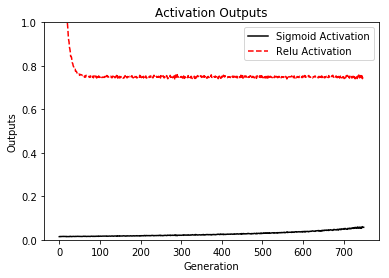

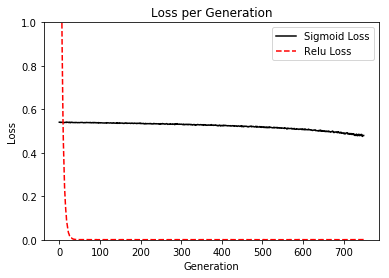

In [21]:
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()
plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss')
plt.plot(loss_vec_relu, 'r--', label='Relu Loss')
plt.ylim([0, 1.0])
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()